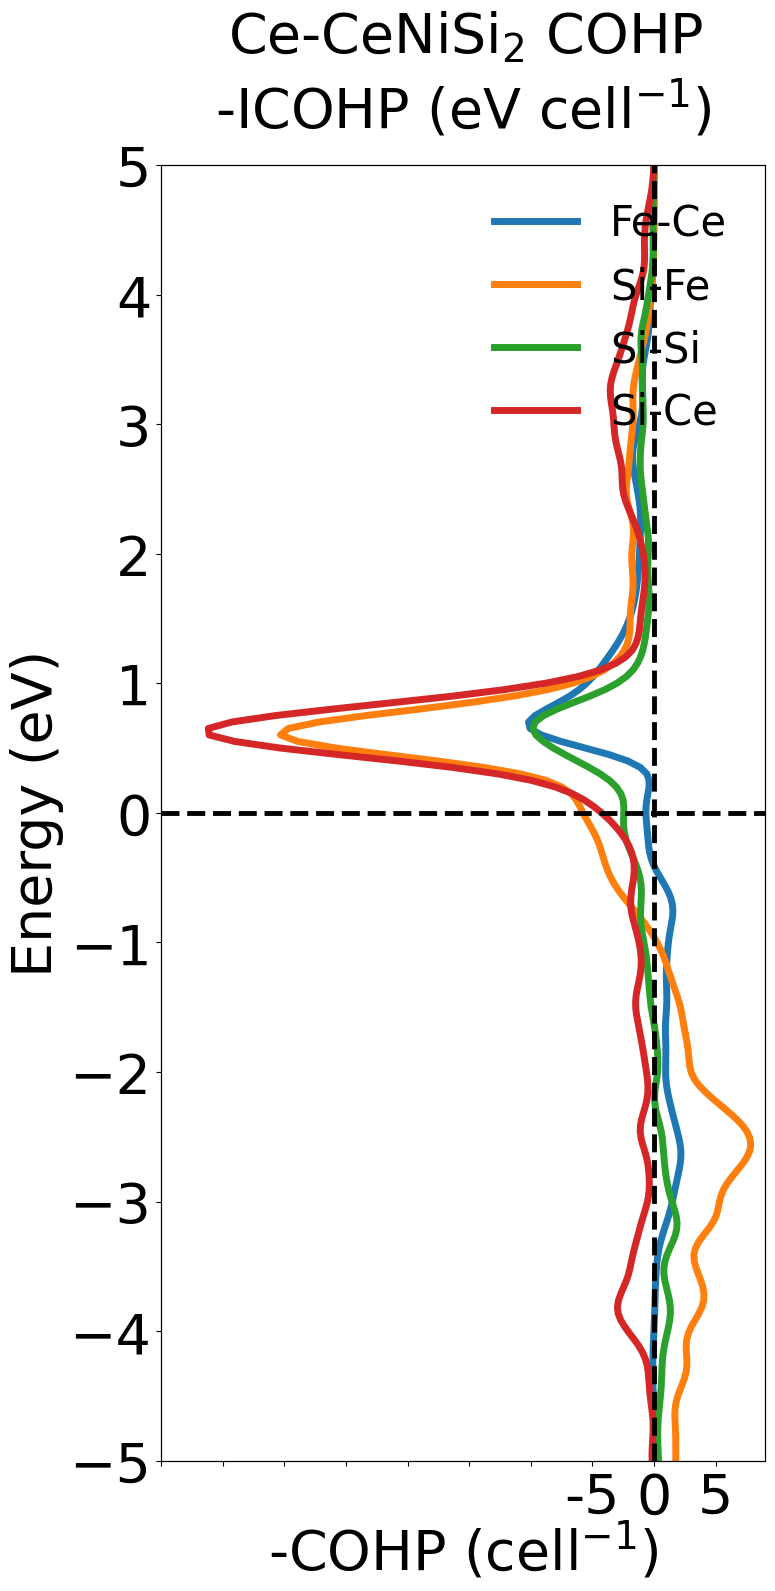

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-40, 9)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Ce-CeNiSi2")

    plot_COHP_contributions(structures_directory)


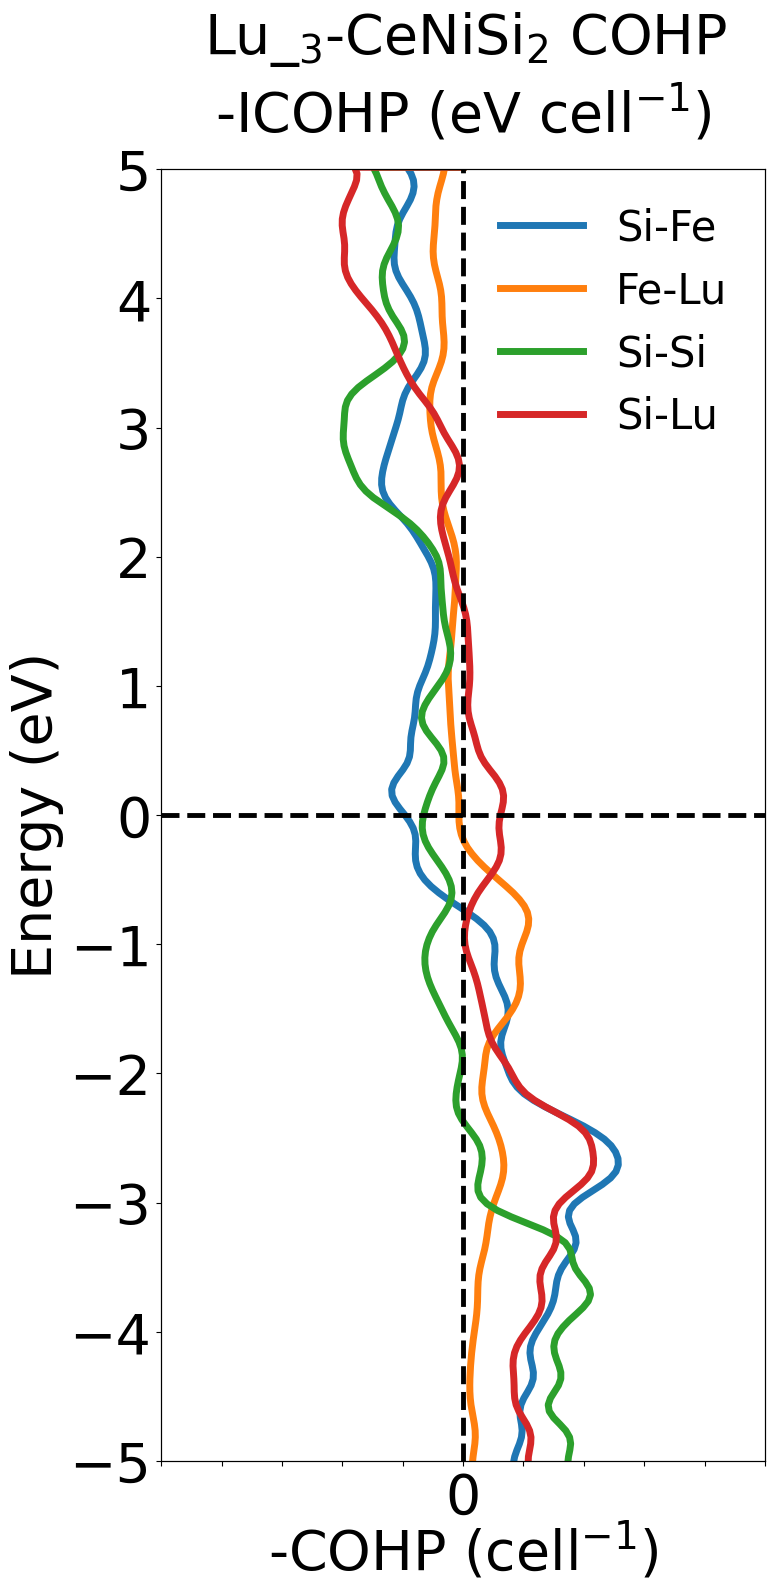

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-20, 20)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Lu_3-CeNiSi2")

    plot_COHP_contributions(structures_directory)


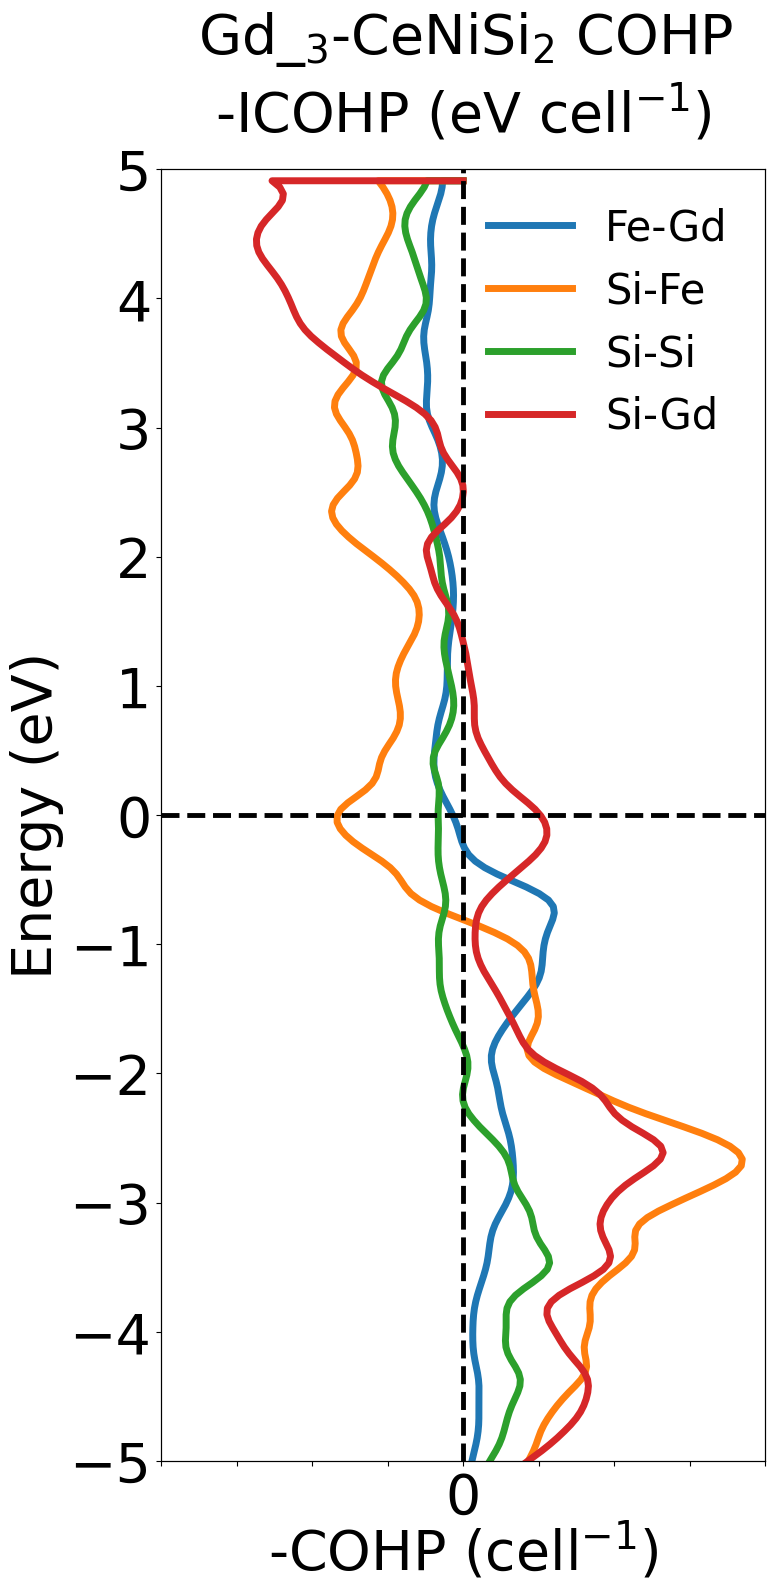

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-12, 12)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Gd_3-CeNiSi2")

    plot_COHP_contributions(structures_directory)


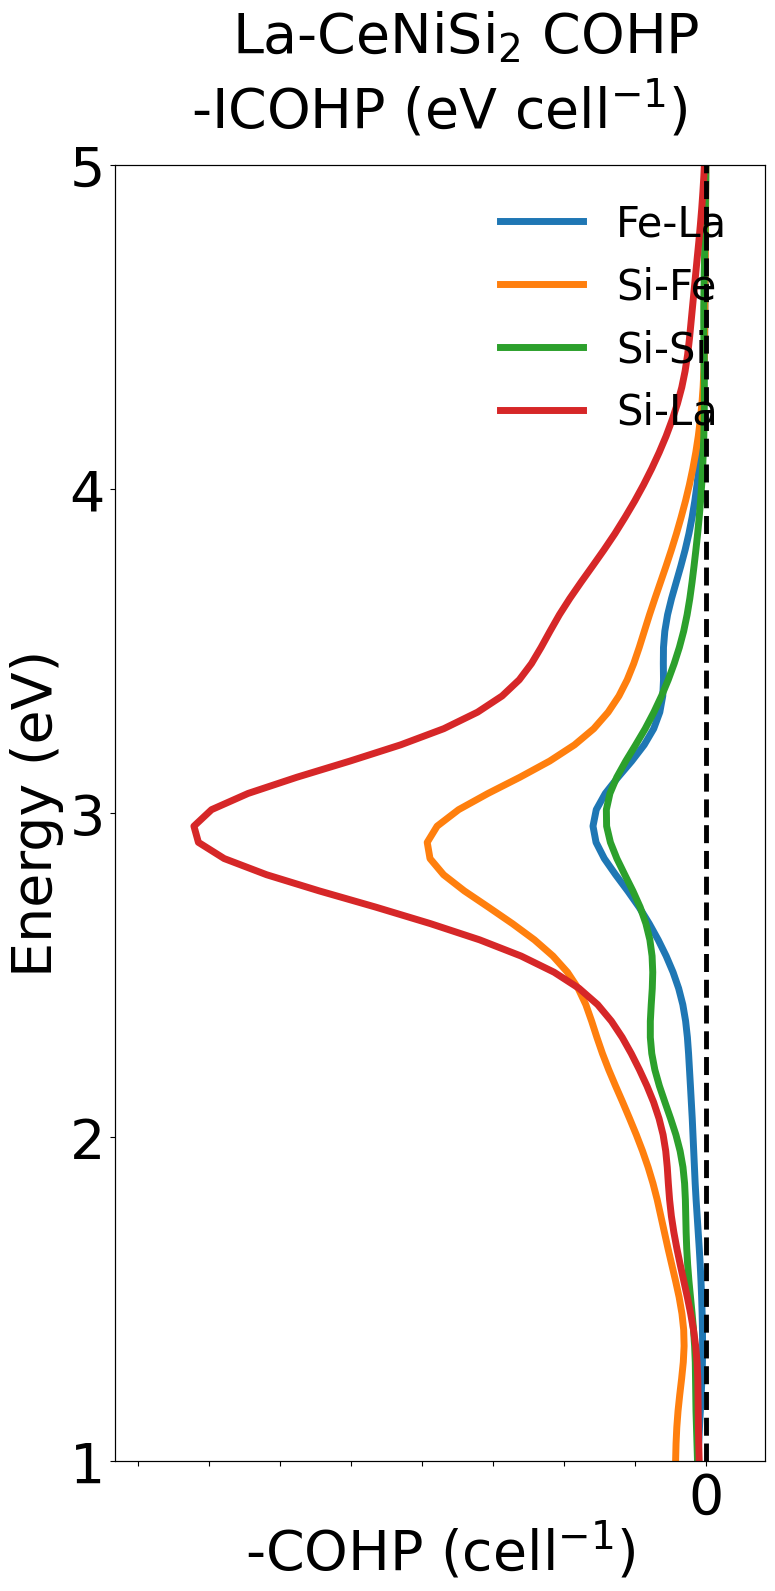

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(1, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-50, 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/La-CeNiSi2")

    plot_COHP_contributions(structures_directory)


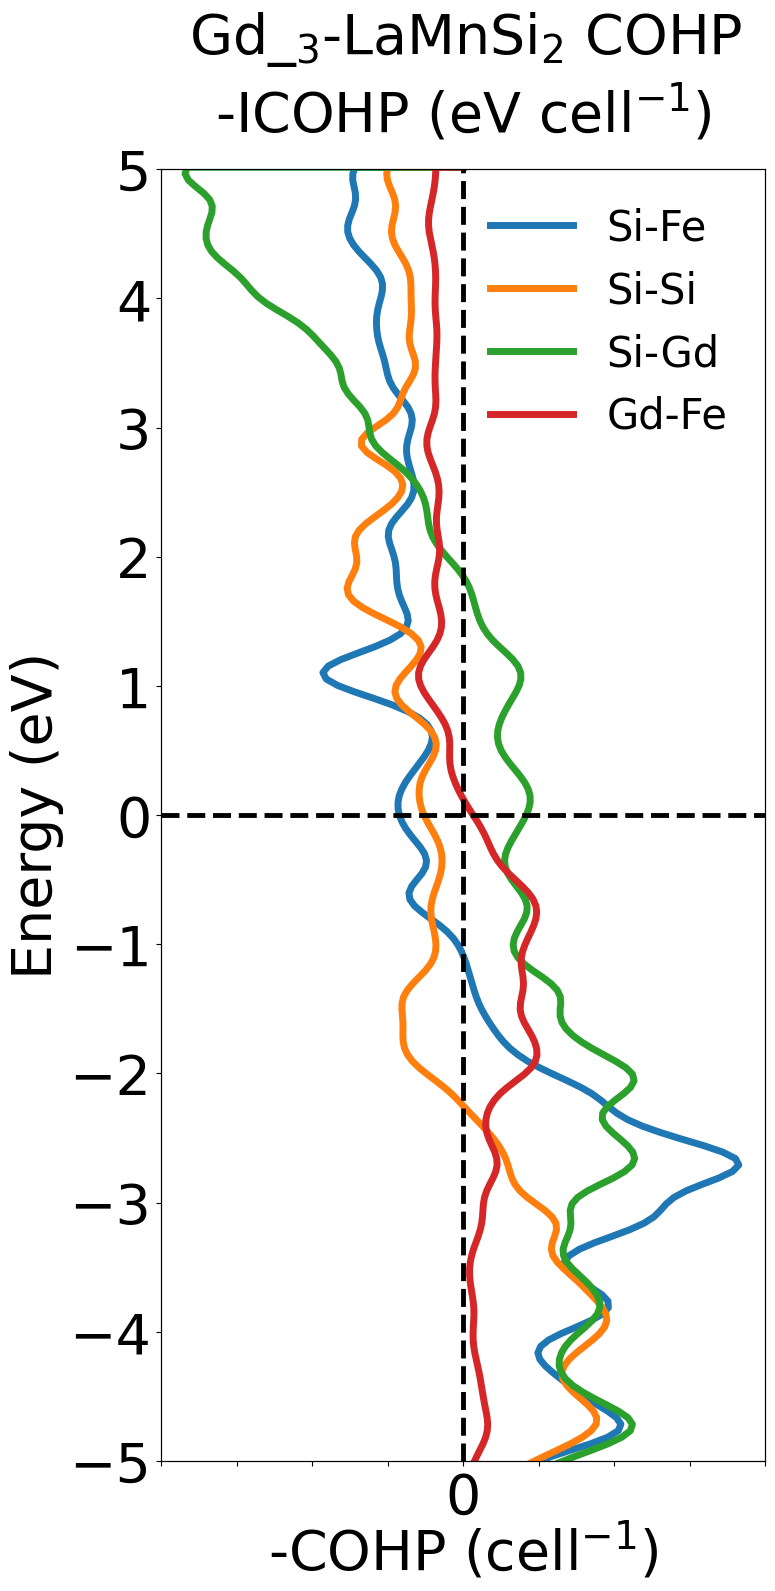

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-12, 12)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Gd_3-LaMnSi2")

    plot_COHP_contributions(structures_directory)


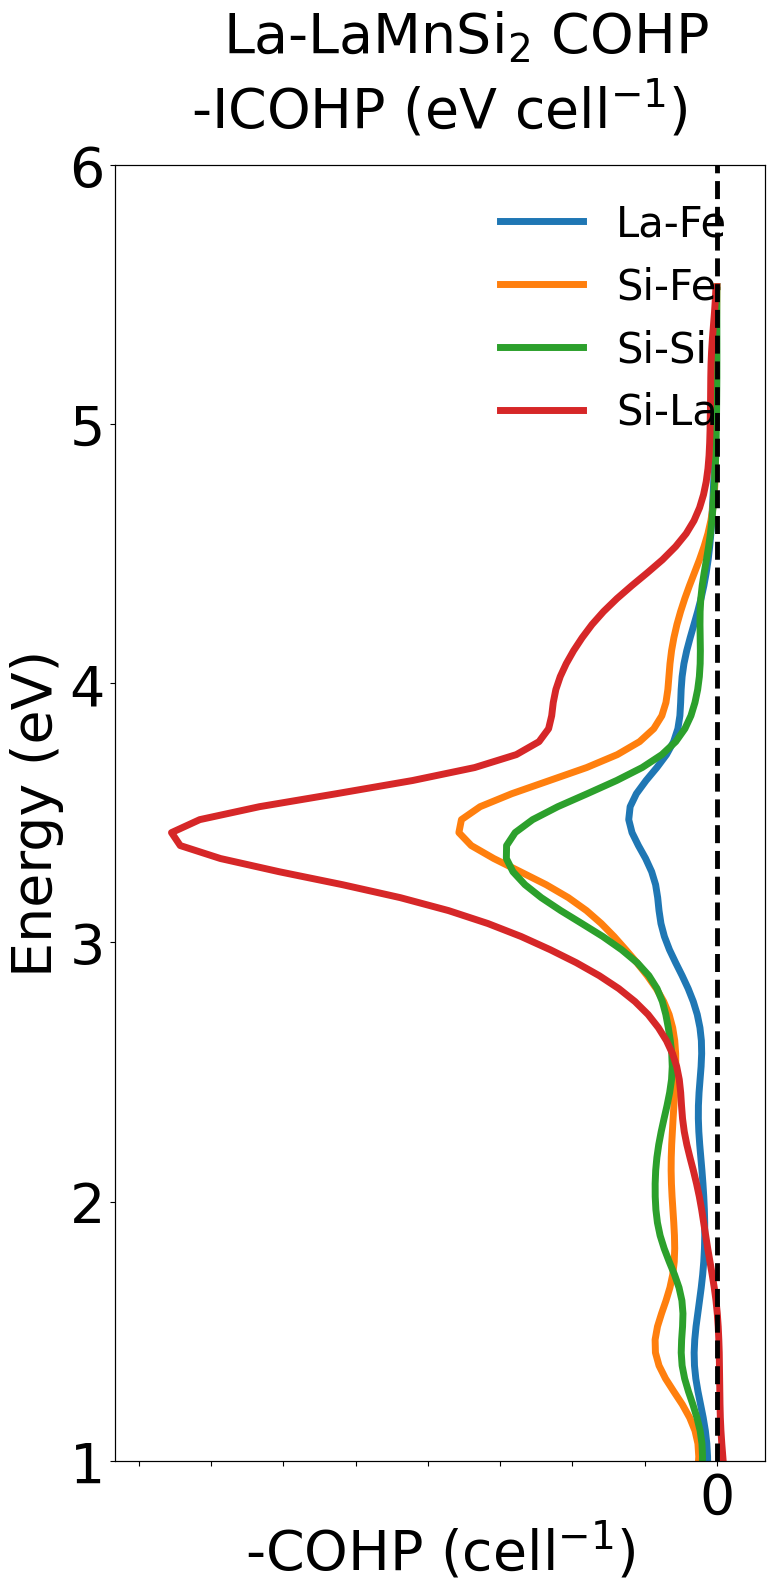

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(1, 6)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-50, 4)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/La-LaMnSi2")

    plot_COHP_contributions(structures_directory)


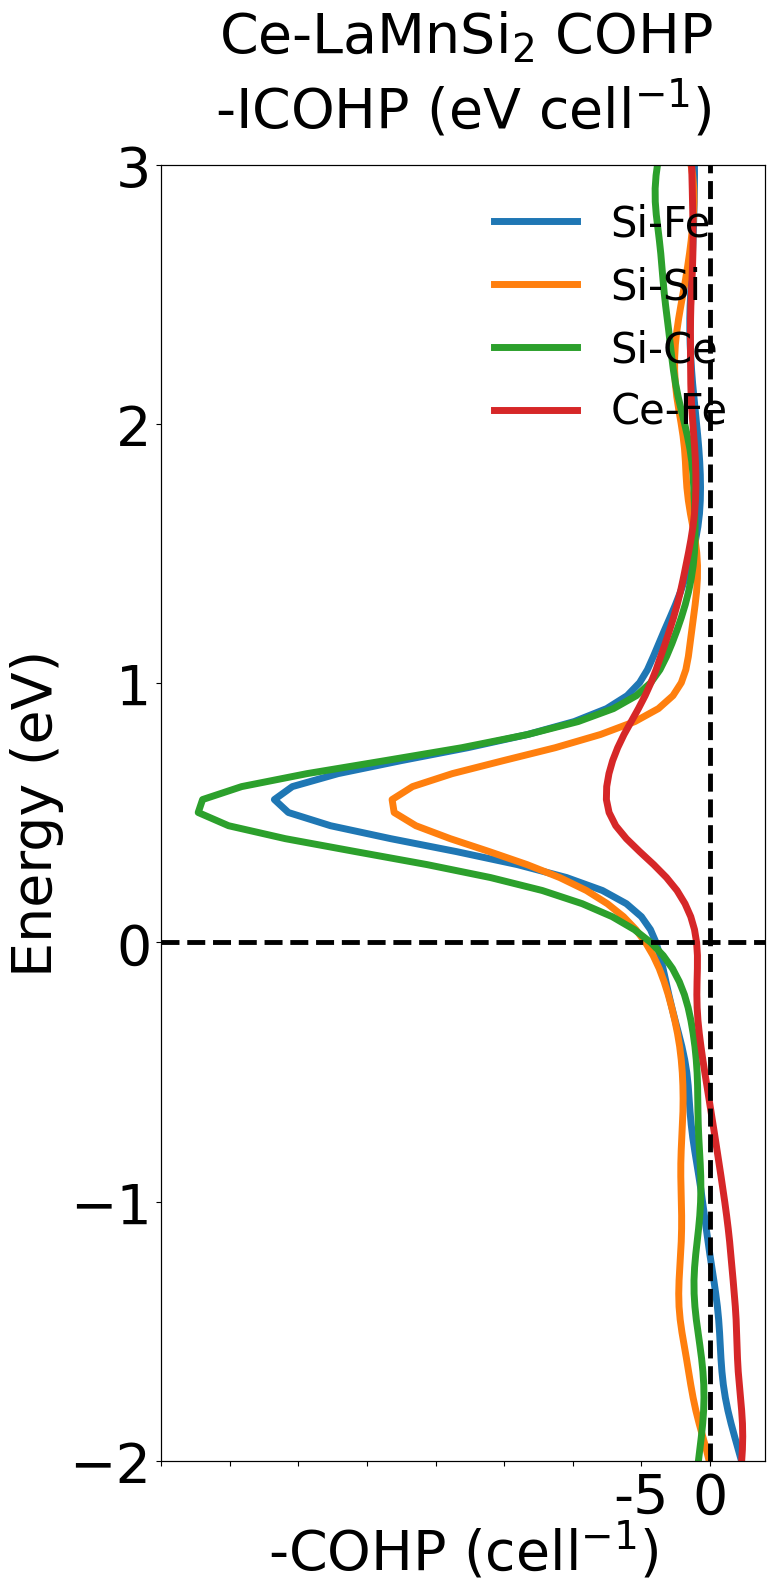

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-2, 3)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-40, 4)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Ce-LaMnSi2")

    plot_COHP_contributions(structures_directory)


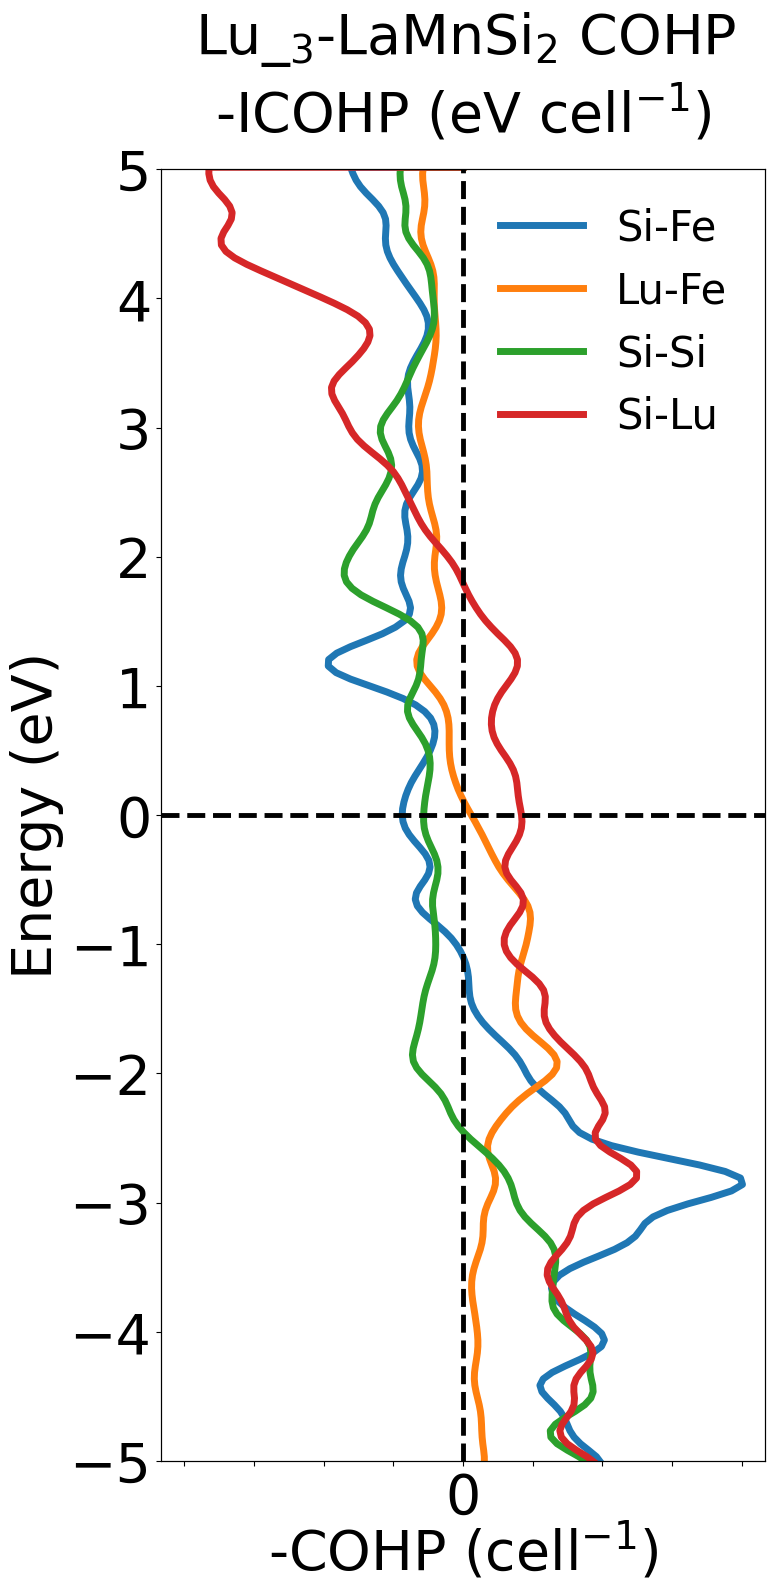

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-13, 13)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Lu_3-LaMnSi2")

    plot_COHP_contributions(structures_directory)


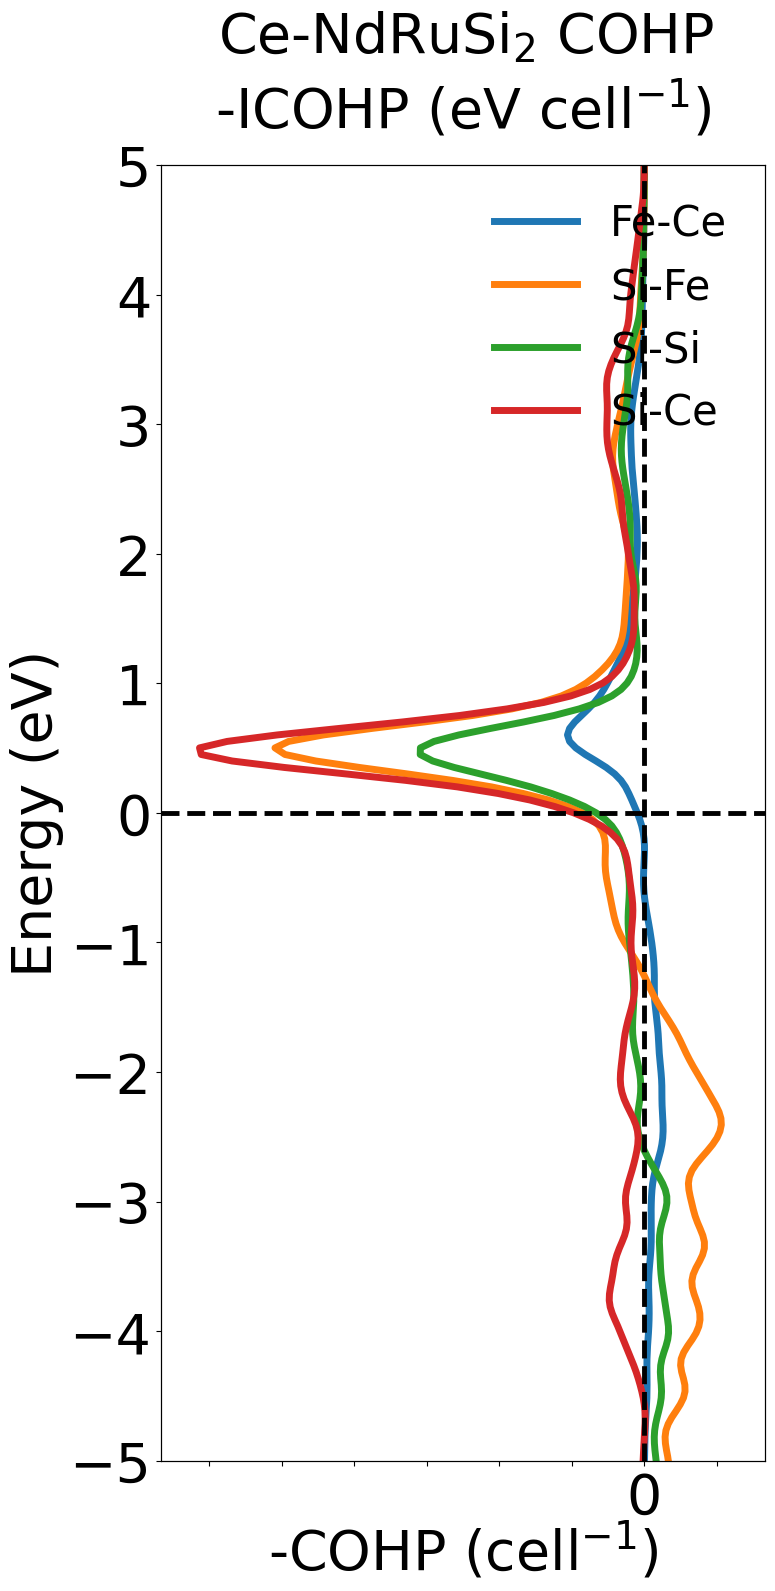

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-20, 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Ce-NdRuSi2")

    plot_COHP_contributions(structures_directory)


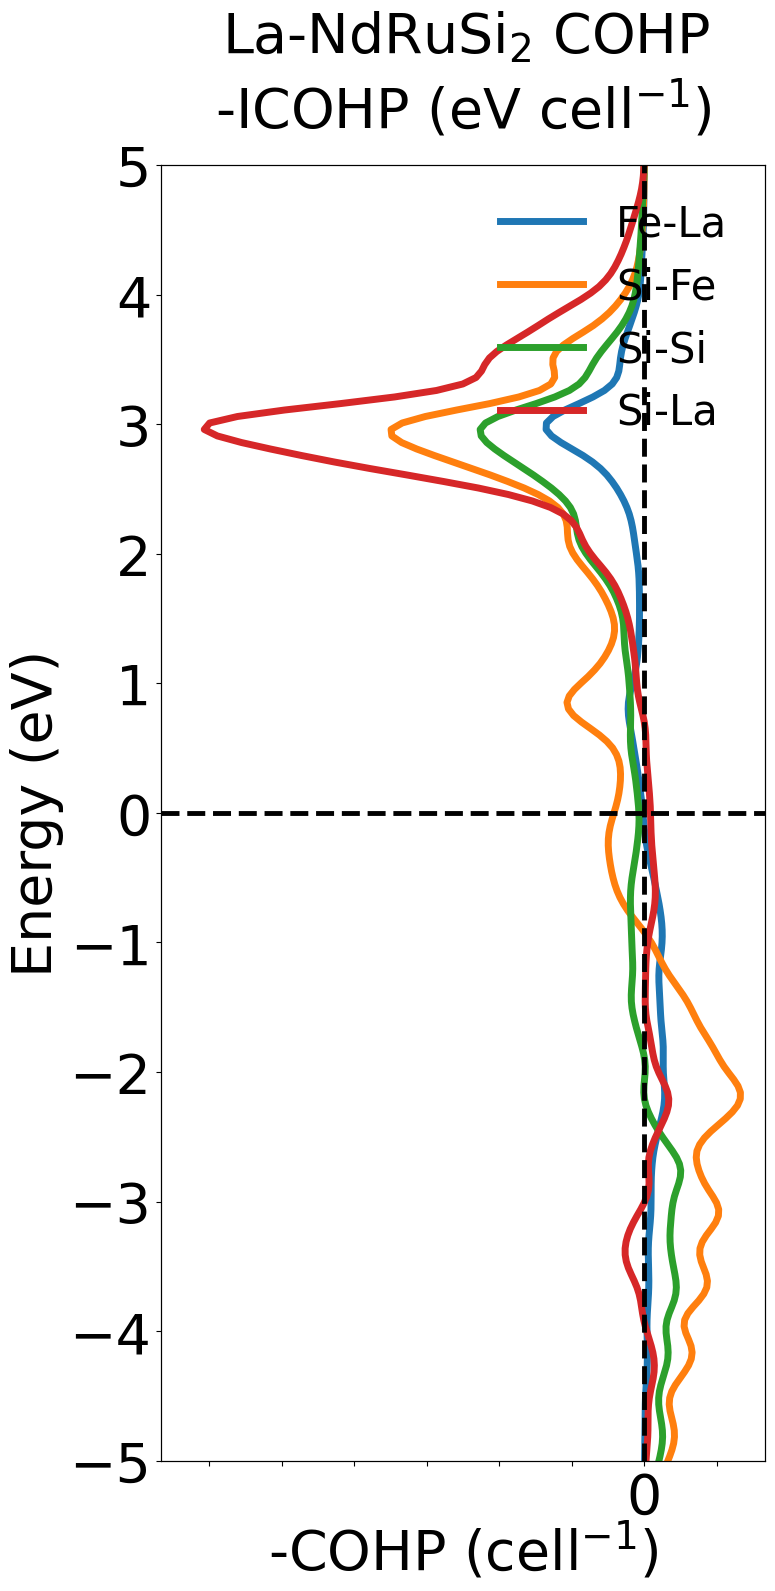

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-20, 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/La-NdRuSi2")

    plot_COHP_contributions(structures_directory)


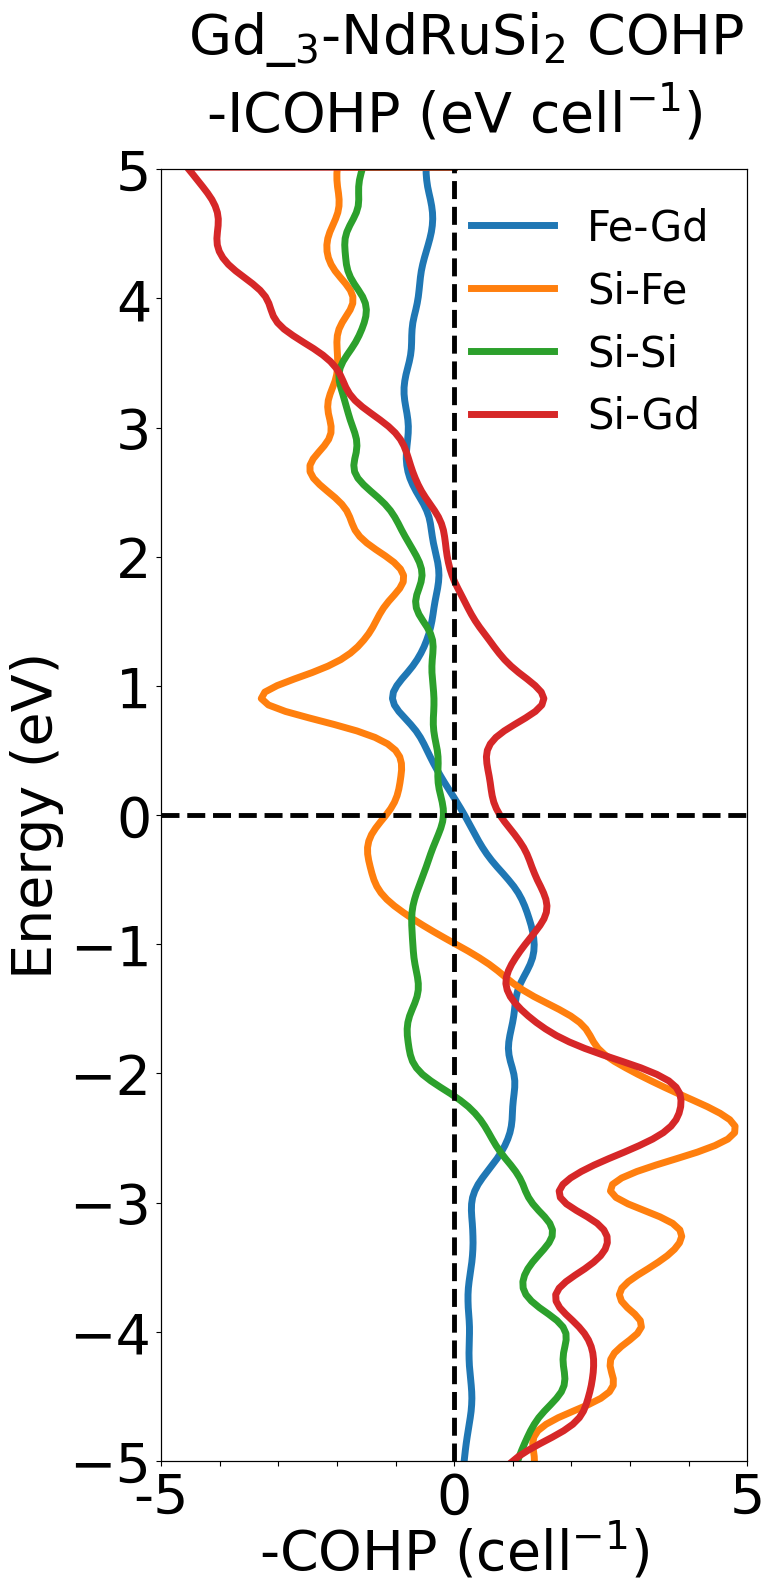

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-5, 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Gd_3-NdRuSi2")

    plot_COHP_contributions(structures_directory)


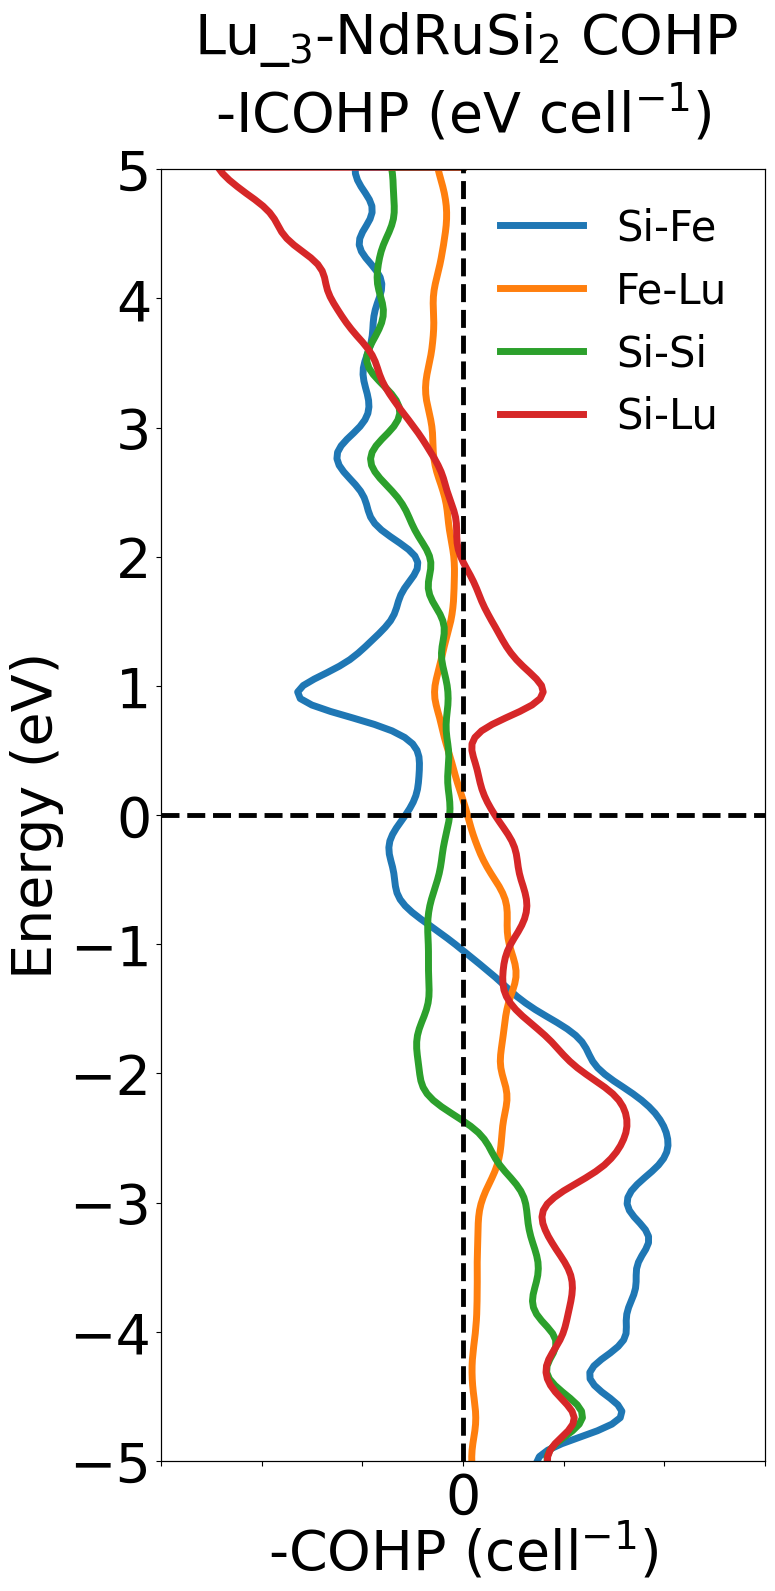

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_COHP_contributions(directory):
    COHP_files = get_COHP_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(COHP_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-5, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-6, 6)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_COHP_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    COHP_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return COHP_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2/Lu_3-NdRuSi2")

    plot_COHP_contributions(structures_directory)
